# Pymaceuticals Inc.
---

### Analysis

- The Drug Regimen Capomulin had the most test subjects.
- There is a stong correlation between the weight of the mouse and the size of the tumor.
- Capomulin and Ramicane were the most successful at combating the tumors.
- There were almost equal amounts of Female and Male specimens (49% to 51%) 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/chac/Desktop/Class/Module_5_Assignment/matplotlib_challenge/Resources/Mouse_metadata.csv"
study_results_path = "/Users/chac/Desktop/Class/Module_5_Assignment/matplotlib_challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mmd_complete_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
mmd_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = len(mmd_complete_df["Mouse ID"].unique())
num_mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = mmd_complete_df[mmd_complete_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mmd_complete_df.loc[mmd_complete_df["Mouse ID"] =="g989", :]
duplicate_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mmd_complete_df[mmd_complete_df["Mouse ID"].isin(duplicate_mice_df)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = mmd_complete_df.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
med = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_dev = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summ_stat = pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume": med,
                          "Tumor Volume Variance": var,
                          "Tumor Volume Std. Dev": std_dev,
                          "Tumor Volume Std. Err.": sem})
summ_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summ_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summ_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

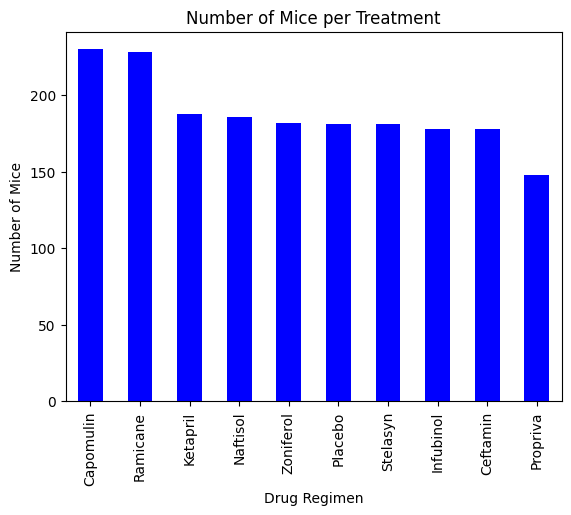

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

plot_pandas = mice_count.plot.bar(color="b")  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

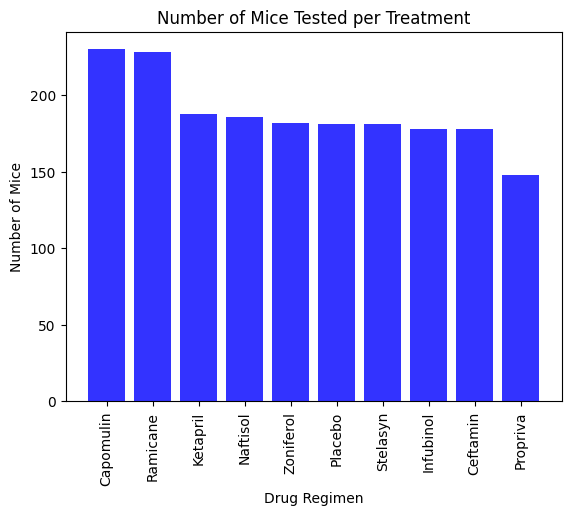

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot
plt.bar(x_axis, y_axis, color="b", alpha=0.8, align="center")

# Set the xlabel and ylabel
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

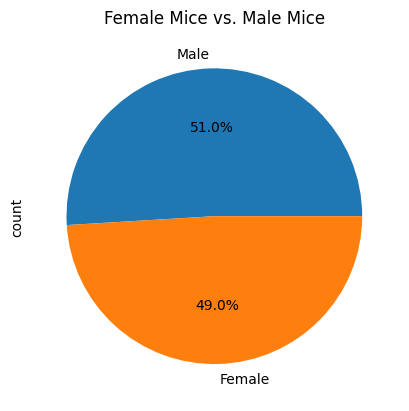

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female Mice vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

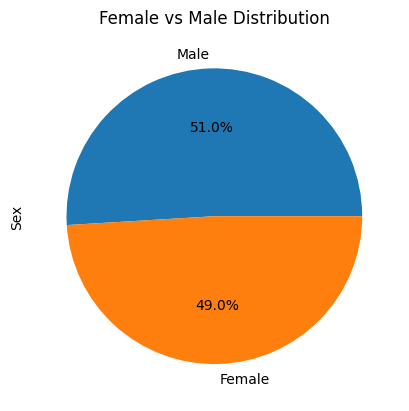

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y= "Total Count", autopct="%1.1f%%")
plt.title("Female vs Male Distribution")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last_timepoint = capomulin_df.groupby("Mouse ID")["Timepoint"].max()
ramicane_last_timepoint = ramicane_df.groupby("Mouse ID")["Timepoint"].max()
infubinol_last_timepoint = infubinol_df.groupby("Mouse ID")["Timepoint"].max()
ceftamin_last_timepoint = ceftamin_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Loop through each drug regimen
for regimen in regimens:
    # Select the corresponding DataFrame for the current regimen
    regimen_df = clean_df.loc[clean_df["Drug Regimen"] == regimen, :]
    
    # Get the last (greatest) timepoint for each mouse in the current regimen
    last_timepoints = regimen_df.groupby("Mouse ID")["Timepoint"].max()
    
    # Merge to get the tumor volume at the last timepoint
    last_tumor_volume_df = pd.merge(last_timepoints, clean_df, on=("Mouse ID", "Timepoint"), how="left")
    
    # Add the tumor volumes to the list
    final_tumor_volumes.append(last_tumor_volume_df["Tumor Volume (mm3)"])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for i in range(len(regimens)):
    quartiles = final_tumor_volumes[i].quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = final_tumor_volumes[i][(final_tumor_volumes[i] < lower_bound) | (final_tumor_volumes[i] > upper_bound)]
    
    print(f"Regimen: {regimens[i]}")
    print(f"IQR: {iqr}")
    print(f"Potential outliers: {outliers}\n")

Regimen: Capomulin
IQR: 7.781863460000004
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Ramicane
IQR: 9.098536719999998
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Infubinol
IQR: 11.477135160000003
Potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64

Regimen: Ceftamin
IQR: 15.577752179999997
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



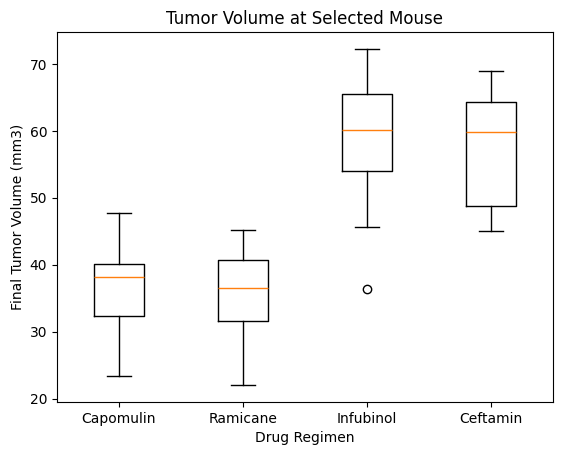

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, axis_one = plt.subplots()
axis_one.set_title("Tumor Volume at Selected Mouse")
axis_one.set_ylabel("Final Tumor Volume (mm3)")
axis_one.set_xlabel("Drug Regimen")
axis_one.boxplot(final_tumor_volumes, labels=regimens, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

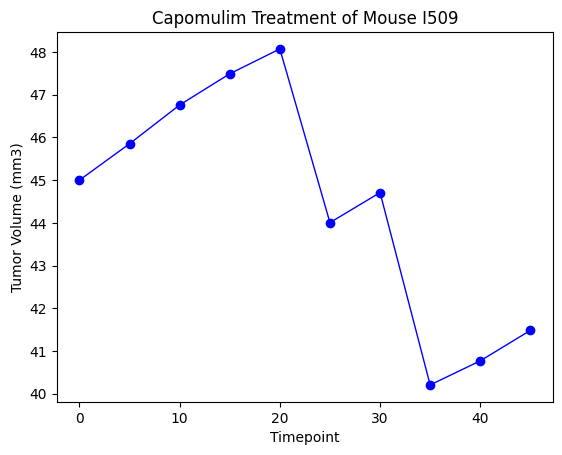

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = clean_df.loc[clean_df["Mouse ID"] == "l509"]
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

tumor_volume = plt.plot(x_axis, y_axis, marker = "o", color = "b", linewidth = "1", label = "Timepoint")
plt.title("Capomulim Treatment of Mouse I509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

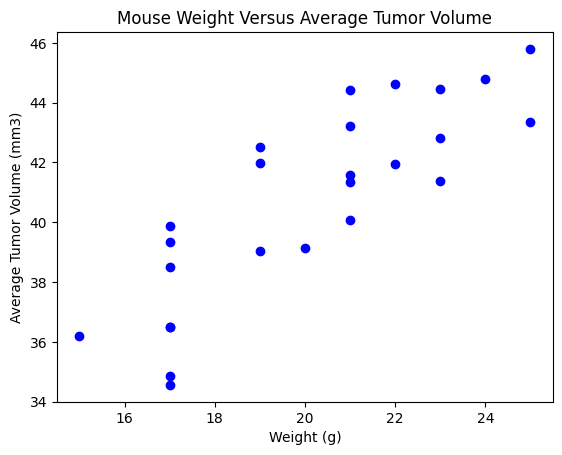

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capm_vol =capomulin_df.groupby(["Mouse ID"]).mean(numeric_only=True)

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"], color="b")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)",fontsize =10)
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


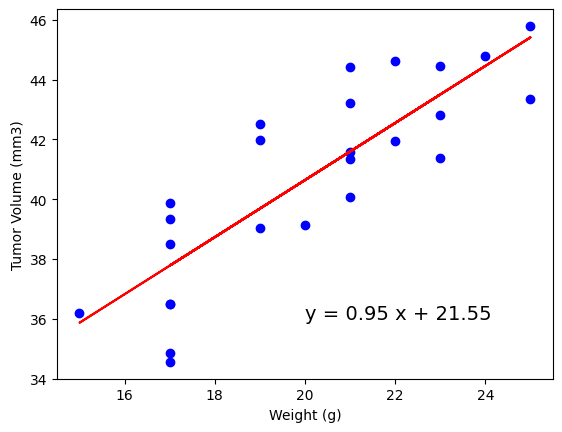

In [21]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()